# Checking for Hypothyroidism

# 1. Defining the Question

### a) Specifying the Question

> We are to Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid. 

### b) Defining the Metric for Success

### c) Understanding the context 

> Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

### d) Recording the Experimental Design

1. Loading the datasets
2. Data Preparation
3. Investigating the dataset
4. Data cleaning
5. Exploratory Data Analysis(Univariate, Bivariate, Multivariate)
6. Modelling
7. Answering the question
8. Conclusion
9. Recommendation
10. Follow up questions

### e) Data Relevance

We will measure the relevance after doing analysis of the dataset.

# 2. Reading the Data

## Importing Libraries

In [103]:
# Importing libraries
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading datasets

In [104]:
hypothyroid = pd.read_csv('/home/mirana/Downloads/core/week 8/hypothyroid.csv')

# 3. Checking the Data

In [105]:
# top of dataset
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [106]:
# bottom of dataset

hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [107]:
# Determining the no. of records in our hypothyroid dataset
#
hypothyroid.count()

status                       3163
age                          3163
sex                          3163
on_thyroxine                 3163
query_on_thyroxine           3163
on_antithyroid_medication    3163
thyroid_surgery              3163
query_hypothyroid            3163
query_hyperthyroid           3163
pregnant                     3163
sick                         3163
tumor                        3163
lithium                      3163
goitre                       3163
TSH_measured                 3163
TSH                          3163
T3_measured                  3163
T3                           3163
TT4_measured                 3163
TT4                          3163
T4U_measured                 3163
T4U                          3163
FTI_measured                 3163
FTI                          3163
TBG_measured                 3163
TBG                          3163
dtype: int64

In [108]:
# Checking whether each column has an appropriate datatype
#
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

# 4. External Data Source Validation

# 5. Data Cleaning

In [109]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

### a. Validation

In [110]:
# dealing with white spaces
hypothyroid.columns = hypothyroid.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
hypothyroid.columns

/tmp/ipykernel_2796/3238624708.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hypothyroid.columns = hypothyroid.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [111]:
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [112]:
# change to right data type

hypothyroid['age'] = pd.to_numeric(hypothyroid['age'],errors = 'coerce')
hypothyroid['t3'] = pd.to_numeric(hypothyroid['t3'],errors = 'coerce')
hypothyroid['tt4'] = pd.to_numeric(hypothyroid['tt4'],errors = 'coerce')
hypothyroid['t4u'] = pd.to_numeric(hypothyroid['t4u'],errors = 'coerce')
hypothyroid['fti'] = pd.to_numeric(hypothyroid['fti'],errors = 'coerce')

In [113]:
# checking change
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3163 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

## Checking outliers

/home/mirana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mirana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mirana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/m

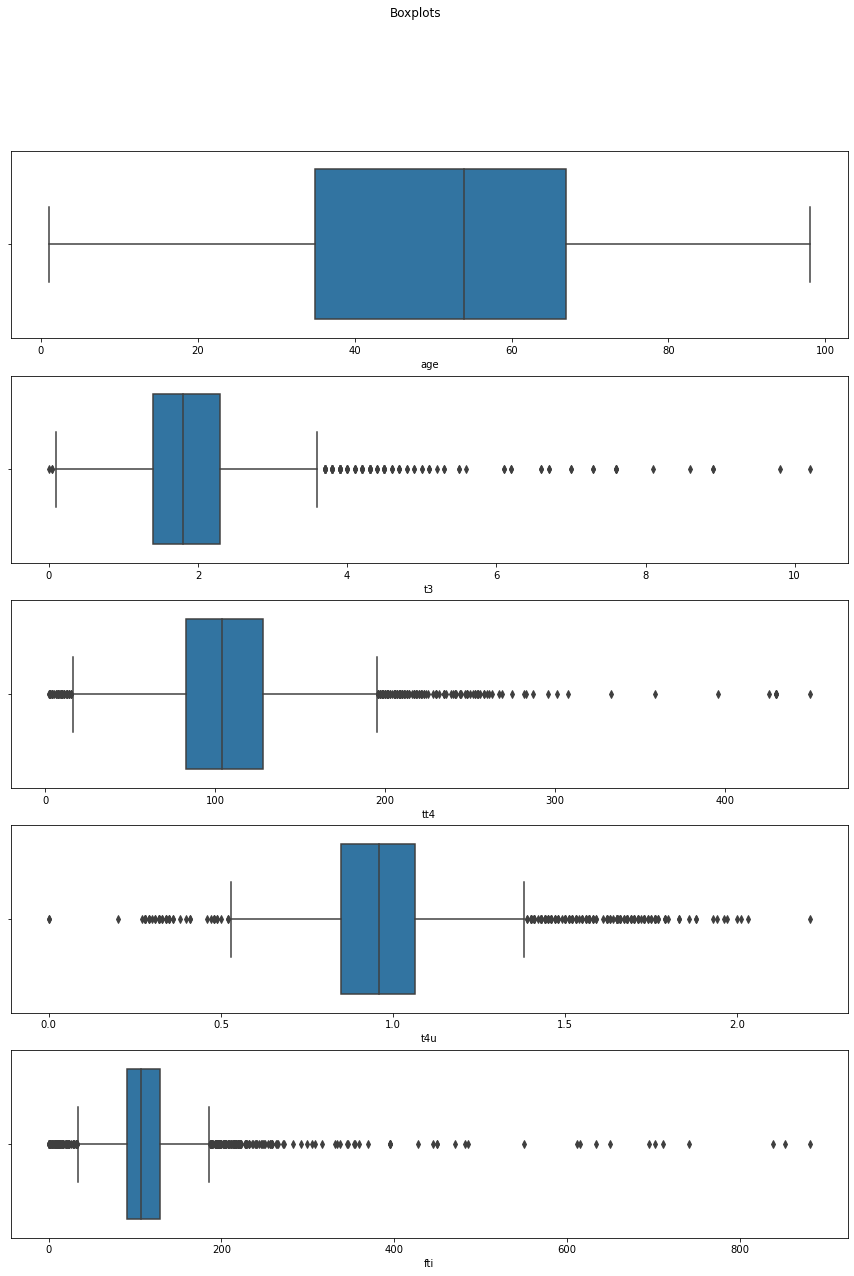

In [114]:
# Checking for Outliers
#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(15, 20))
fig.suptitle('Boxplots')
sns.boxplot(hypothyroid['age'], ax=ax1)
sns.boxplot(hypothyroid['t3'], ax=ax2)
sns.boxplot(hypothyroid['tt4'], ax=ax3)
sns.boxplot(hypothyroid['t4u'], ax=ax4)
sns.boxplot(hypothyroid['fti'], ax=ax5)




plt.show()

There seems to be a lot of outliers.

## checking missing data

In [115]:
# Identifying the Missing Data
# ranking
hypothyroid.isnull().sum().sum()

1885

In [116]:
# checking shape 
hypothyroid.shape

(3163, 26)

In [117]:
# Dealing with the Missing Data
#
hypothyroid.fillna(hypothyroid.mean(), inplace=True)

/tmp/ipykernel_2796/3207605939.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hypothyroid.fillna(hypothyroid.mean(), inplace=True)


In [118]:
# confirming no missing values

hypothyroid.isnull().sum().sum()

0

## checking duplicates

In [119]:
# checking hypothyroid duplicates and dropping
hypothyroid.duplicated().sum()
hypothyroid.drop_duplicates().head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,?
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,?
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.2,y,4.0,y,1.00,y,0.0,n,?
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,0.4,y,6.0,y,1.04,y,6.0,n,?
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,?


## checking anomalies

### using isolation forest

In [120]:
# rank

from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=1000, contamination=float(0.1))
isolation_forest.fit(hypothyroid['age'].values.reshape(-1, 1))
hypothyroid['anomaly_score_rate'] = isolation_forest.decision_function(hypothyroid['age'].values.reshape(-1, 1))
hypothyroid['anomaly'] = isolation_forest.predict(hypothyroid['age'].values.reshape(-1, 1))
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg,anomaly_score_rate,anomaly
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,15.0,y,1.48,y,10.0,n,?,0.067129,1
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,19.0,y,1.13,y,17.0,n,?,-0.061140,-1
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,4.0,y,1.00,y,0.0,n,?,0.033699,1
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,6.0,y,1.04,y,6.0,n,?,0.033699,1
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,57.0,y,1.28,y,44.0,n,?,0.028076,1


In [121]:
# predicted anomaly
anomaly=hypothyroid.loc[hypothyroid['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

           status   age sex on_thyroxine query_on_thyroxine  \
1     hypothyroid  15.0   F            t                  f   
5     hypothyroid  85.0   F            f                  f   
8     hypothyroid  20.0   F            f                  f   
25    hypothyroid  84.0   F            f                  f   
27    hypothyroid  83.0   F            f                  f   
...           ...   ...  ..          ...                ...   
3094     negative  80.0   M            f                  f   
3111     negative  89.0   M            f                  f   
3131     negative  16.0   F            f                  f   
3147     negative  80.0   F            f                  f   
3150     negative  15.0   M            f                  f   

     on_antithyroid_medication thyroid_surgery query_hypothyroid  \
1                            f               f                 f   
5                            f               f                 t   
8                            f         

In [122]:
# checking ouliers above the given threshold
#outliers_counter = len(hypothyroid[hypothyroid['age'] > 100])
#outliers_counter

In [123]:
# accuracy of model

# print("Accuracy percentage:", 100*list(hypothyroid['anomaly']).count(-1)/(anomaly))

In [124]:
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        3163 non-null   float64
 2   sex                        3163 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

# 6. Exploratory Data Analysis: 

## Univariate analysis

In [125]:
# Ploting the univariate summaries and recording our observations


hypothyroid.describe()

,age,t3,tt4,t4u,fti,anomaly_score_rate,anomaly
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,51.154214,1.939749,108.850000,0.978199,115.397771,0.069993,0.809674
std,17.881969,0.880441,43.657766,0.217513,57.838927,0.063561,0.586972
min,1.000000,0.000000,2.000000,0.000000,0.000000,-0.199267,-1.000000
25%,38.000000,1.500000,85.000000,0.860000,92.000000,0.051087,1.000000
50%,51.154214,1.939749,107.000000,0.978199,110.000000,0.066190,1.000000
75%,64.000000,2.200000,124.000000,1.050000,126.000000,0.088500,1.000000
max,98.000000,10.200000,450.000000,2.210000,881.000000,0.185547,1.000000


In [126]:
# quantiles

hypothyroid.quantile([0.25,0.5,0.75])

,age,t3,tt4,t4u,fti,anomaly_score_rate,anomaly
0.25,38.000000,1.500000,85.0,0.860000,92.0,0.051087,1.0
0.50,51.154214,1.939749,107.0,0.978199,110.0,0.066190,1.0
0.75,64.000000,2.200000,124.0,1.050000,126.0,0.088500,1.0


In [127]:
# skewness
hypothyroid.skew()

/tmp/ipykernel_2796/1165111864.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hypothyroid.skew()


age                  -0.175276
t3                    2.401958
tt4                   1.571505
t4u                   0.954853
fti                   5.317936
anomaly_score_rate   -0.303865
anomaly              -2.760562
dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'t3'}>,
        <AxesSubplot:title={'center':'tt4'}>],
       [<AxesSubplot:title={'center':'t4u'}>,
        <AxesSubplot:title={'center':'fti'}>,
        <AxesSubplot:title={'center':'anomaly_score_rate'}>],
       [<AxesSubplot:title={'center':'anomaly'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

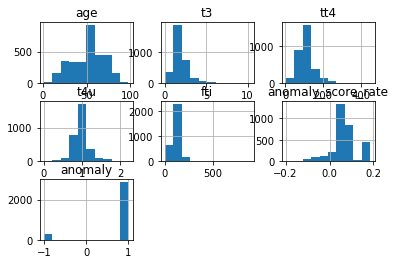

In [128]:
# histogram for total_points 
hypothyroid.hist()

## Bivariate analysis

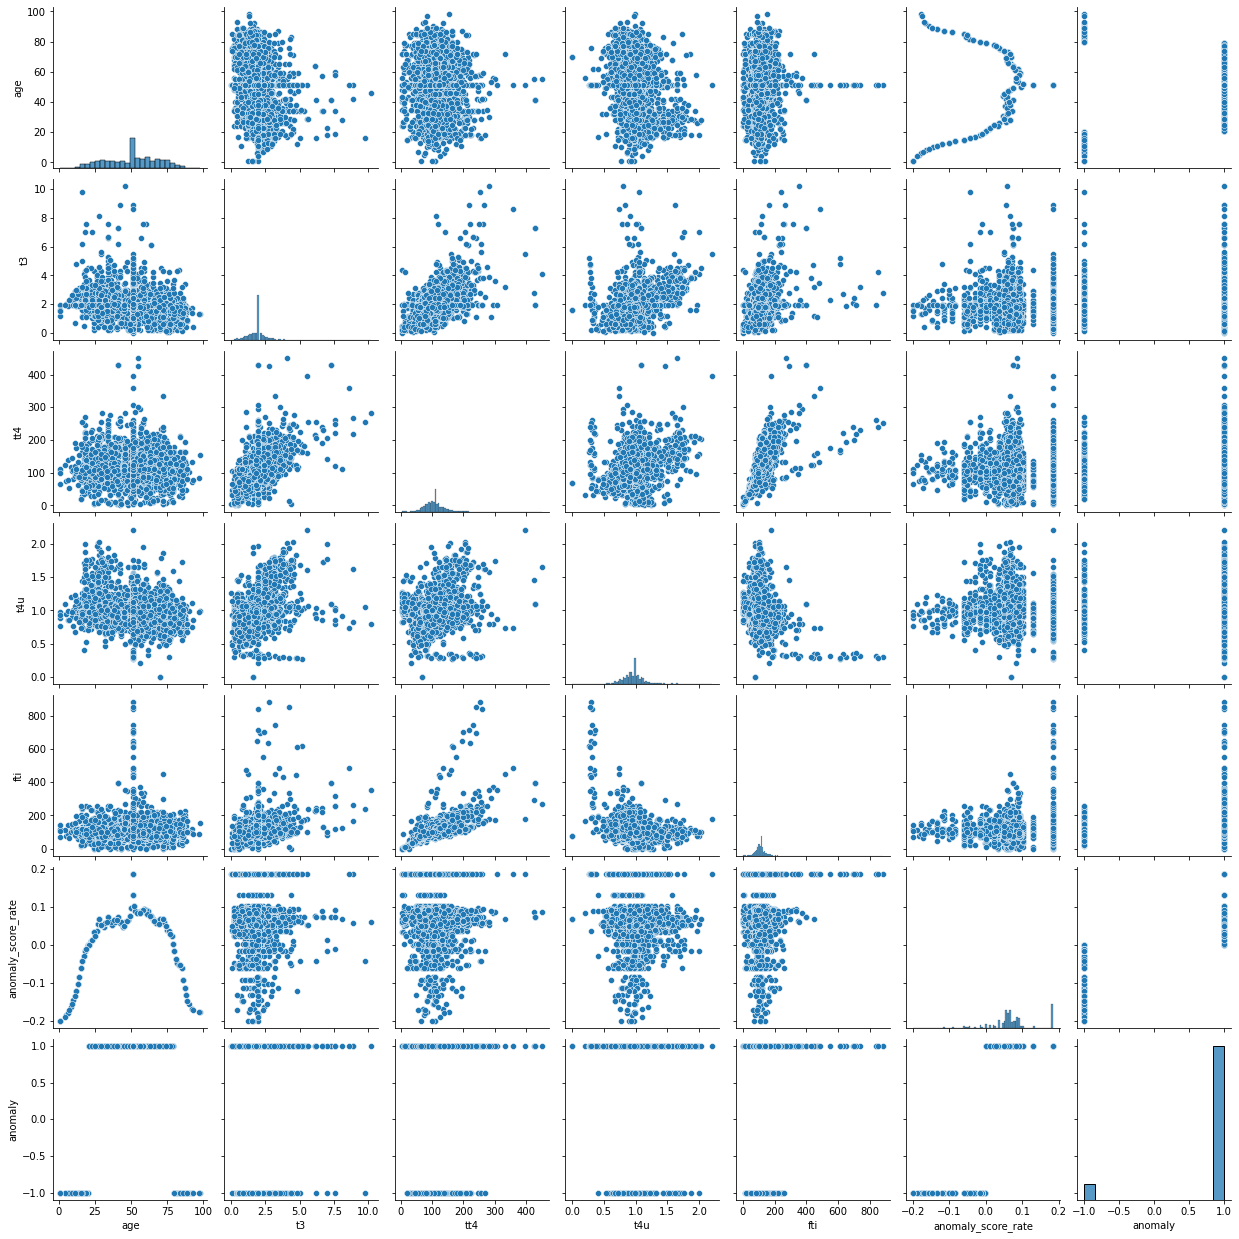

In [129]:
# Ploting the bivariate summaries and recording our observations

sns.pairplot(hypothyroid)
plt.show()

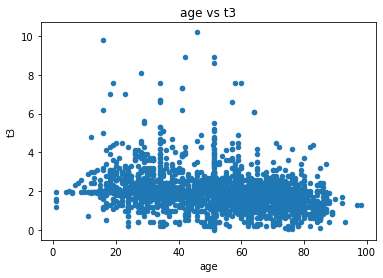

In [130]:
# Using Pandas: Plotting our scatterplot to compare the variables
hypothyroid.plot(x = 'age', y = 't3', kind='scatter')

# Giving our scatterplot a title
plt.title('age vs t3')

# Labelling our x axis
plt.xlabel('age')

# Labelling our y axis
plt.ylabel('t3')

# We then display our scatterplot as shown below
plt.show()

In [131]:
# general correlation
hypothyroid.corr()

,age,t3,tt4,t4u,fti,anomaly_score_rate,anomaly
age,1.000000,-0.268648,-0.091175,-0.194656,0.015460,0.067704,0.072398
t3,-0.268648,1.000000,0.545331,0.388043,0.293912,0.008168,0.001396
tt4,-0.091175,0.545331,1.000000,0.322826,0.684872,-0.014398,-0.021553
t4u,-0.194656,0.388043,0.322826,1.000000,-0.283253,-0.085020,-0.017411
fti,0.015460,0.293912,0.684872,-0.283253,1.000000,0.093512,0.001621
anomaly_score_rate,0.067704,0.008168,-0.014398,-0.085020,0.093512,1.000000,0.644359
anomaly,0.072398,0.001396,-0.021553,-0.017411,0.001621,0.644359,1.000000


<AxesSubplot:>

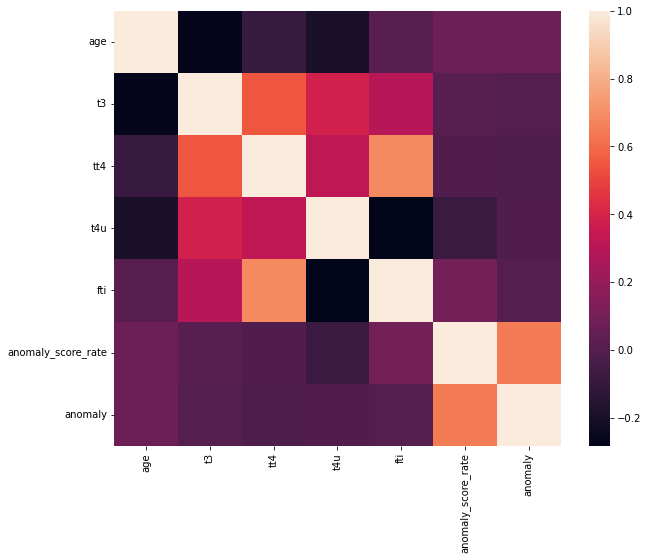

In [132]:
# heatmap for looking at how the variables interact
columns = ('age', 't3')
f, ax = plt.subplots(figsize=(10, 8))
corr = hypothyroid.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [133]:
# correlation
# Calculating the pearson coefficient
pc = hypothyroid["age"].corr(hypothyroid["t3"], method="pearson") 
print(pc)

# Checking whether you have to define the pearson
coeff = hypothyroid["age"].corr(hypothyroid["t3"]) 
print(coeff)

-0.2686477400417729
-0.2686477400417729


In [134]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg',
       'anomaly_score_rate', 'anomaly'],
      dtype='object')

In [135]:
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg,anomaly_score_rate,anomaly
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,15.0,y,1.48,y,10.0,n,?,0.067129,1
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,19.0,y,1.13,y,17.0,n,?,-0.061140,-1
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,4.0,y,1.00,y,0.0,n,?,0.033699,1
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,6.0,y,1.04,y,6.0,n,?,0.033699,1
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,57.0,y,1.28,y,44.0,n,?,0.028076,1


In [136]:
# picking columns for normality test
hypothyroid_norm =  hypothyroid[['age','t3','tt4','t4u','fti']]
hypothyroid_norm.head()

,age,t3,tt4,t4u,fti
0,72.0,0.6,15.0,1.48,10.0
1,15.0,1.7,19.0,1.13,17.0
2,24.0,0.2,4.0,1.00,0.0
3,24.0,0.4,6.0,1.04,6.0
4,77.0,1.2,57.0,1.28,44.0


/home/mirana/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


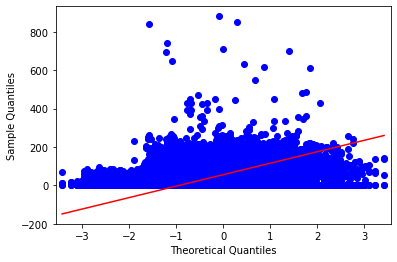

In [137]:
# q-q plot
from statsmodels.graphics.gofplots import qqplot
from numpy.random import seed

# seed the random number generator
seed(1)

# q-q plot
qqplot(hypothyroid_norm, line='s')
plt.show()

## Sampling

In [138]:
# testing ratio
# Non stratified sample
non_strat_output = hypothyroid.sample(frac=0.1) 

# check the proportion of the non_stratified sample
print(non_strat_output['status'].value_counts())

negative       295
hypothyroid     21
Name: status, dtype: int64


In [139]:
# create a random sample
# dropping the naomaly columns
hypothyroid = hypothyroid.drop(columns=['anomaly_score_rate', 'anomaly'])
# Stratified sample
strat_output_train = hypothyroid.groupby('status', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.5))

# proportion of the non_stratified sample
print(hypothyroid['status'].value_counts())

# Check the stratified output
print(strat_output_train)

negative       3012
hypothyroid     151
Name: status, dtype: int64
           status        age sex on_thyroxine query_on_thyroxine  \
33    hypothyroid  65.000000   F            f                  f   
143   hypothyroid  51.154214   ?            f                  f   
4     hypothyroid  77.000000   M            f                  f   
79    hypothyroid  65.000000   F            t                  f   
38    hypothyroid  71.000000   M            t                  f   
...           ...        ...  ..          ...                ...   
1394     negative  80.000000   F            f                  f   
1341     negative  51.154214   M            f                  f   
2315     negative  58.000000   F            f                  f   
2411     negative  82.000000   F            f                  f   
984      negative  37.000000   ?            f                  f   

     on_antithyroid_medication thyroid_surgery query_hypothyroid  \
33                           f               f  

In [140]:
strat_output_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1582 entries, 33 to 984
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     1582 non-null   object 
 1   age                        1582 non-null   float64
 2   sex                        1582 non-null   object 
 3   on_thyroxine               1582 non-null   object 
 4   query_on_thyroxine         1582 non-null   object 
 5   on_antithyroid_medication  1582 non-null   object 
 6   thyroid_surgery            1582 non-null   object 
 7   query_hypothyroid          1582 non-null   object 
 8   query_hyperthyroid         1582 non-null   object 
 9   pregnant                   1582 non-null   object 
 10  sick                       1582 non-null   object 
 11  tumor                      1582 non-null   object 
 12  lithium                    1582 non-null   object 
 13  goitre                     1582 non-null   objec

In [141]:
# preview the stratified train dataset
strat_output_train.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
33,hypothyroid,65.000000,F,f,f,f,f,f,f,f,...,y,1.2,y,24.0,y,0.99,y,24.0,n,?
143,hypothyroid,51.154214,?,f,f,f,f,f,f,f,...,y,1.2,y,37.0,y,1.06,y,35.0,n,?
4,hypothyroid,77.000000,M,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,?
79,hypothyroid,65.000000,F,t,f,f,f,f,f,f,...,y,1.0,y,50.0,y,1.17,y,43.0,n,?
38,hypothyroid,71.000000,M,t,f,f,f,f,f,f,...,y,0.3,y,31.0,y,0.68,y,46.0,n,?


In [142]:
# Stratified test sample

test_strat_dataset = hypothyroid.drop(strat_output_train.index)

# Preview the stratified test dataset
test_strat_dataset.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.200000,y,4.0,y,1.00,y,0.0,n,?
9,hypothyroid,42.0,F,f,f,f,f,f,f,f,...,n,1.939749,y,7.6,y,1.02,y,7.5,n,?
11,hypothyroid,75.0,F,f,f,f,f,f,f,f,...,y,1.100000,y,38.0,y,0.92,y,41.0,n,?
12,hypothyroid,72.0,F,f,f,f,f,f,f,f,...,y,2.200000,y,98.0,y,1.29,y,76.0,n,?
13,hypothyroid,53.0,F,f,f,f,f,f,t,f,...,y,1.500000,y,44.0,y,0.98,y,45.0,n,?


In [143]:
test_strat_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1581 entries, 2 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     1581 non-null   object 
 1   age                        1581 non-null   float64
 2   sex                        1581 non-null   object 
 3   on_thyroxine               1581 non-null   object 
 4   query_on_thyroxine         1581 non-null   object 
 5   on_antithyroid_medication  1581 non-null   object 
 6   thyroid_surgery            1581 non-null   object 
 7   query_hypothyroid          1581 non-null   object 
 8   query_hyperthyroid         1581 non-null   object 
 9   pregnant                   1581 non-null   object 
 10  sick                       1581 non-null   object 
 11  tumor                      1581 non-null   object 
 12  lithium                    1581 non-null   object 
 13  goitre                     1581 non-null   objec

In [144]:
test_strat_dataset.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
3155,negative,51.154214,F,f,f,f,f,f,f,f,...,y,2.4,y,123.0,y,0.99,y,124.0,n,?
3157,negative,69.000000,F,f,f,f,f,f,f,f,...,y,1.8,y,126.0,y,1.02,y,124.0,n,?
3159,negative,29.000000,F,f,f,f,f,f,f,f,...,y,1.8,y,99.0,y,1.01,y,98.0,n,?
3160,negative,77.000000,M,f,f,f,f,f,f,f,...,y,0.6,y,71.0,y,0.68,y,104.0,n,?
3162,negative,56.000000,F,t,f,f,f,f,f,f,...,y,1.8,y,139.0,y,0.97,y,143.0,n,?


In [145]:
# count of status
test_strat_count=test_strat_dataset['status'].value_counts()
train_strat_count=strat_output_train['status'].value_counts()



In [146]:
'''
# Split our datset into train_data and test_data using sklearn's train_test_split method

# train_data, test_data = train_test_split(foota, test_size=0.3,stratify=foota['home_score'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(strat_output_train, test_strat_dataset)
#,test_size=0.3, stratify=foota['home_score'])
# random_state=42)

# Preview the train dataset
print(x_train)

# Preview the test dataset
print(x_test)'''


"\n# Split our datset into train_data and test_data using sklearn's train_test_split method\n\n# train_data, test_data = train_test_split(foota, test_size=0.3,stratify=foota['home_score'])\n\nfrom sklearn.model_selection import train_test_split\nx_train, x_test, y_train, y_test = train_test_split(strat_output_train, test_strat_dataset)\n#,test_size=0.3, stratify=foota['home_score'])\n# random_state=42)\n\n# Preview the train dataset\nprint(x_train)\n\n# Preview the test dataset\nprint(x_test)"

In [147]:

# Print out the proprortions in both train and test dataset
#x_train['status'].value_counts()


In [148]:
# proportion in test dataset
#x_test['status'].value_counts()

## 7. Implementing the Solution

### encoding categorical variables

In [149]:
# Categorical boolean mask
strat_output_train = hypothyroid
categorical = hypothyroid.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = hypothyroid.columns[categorical].tolist()

In [150]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

In [151]:
# apply le on categorical feature columns
hypothyroid[categorical_cols] = hypothyroid[categorical_cols].apply(lambda col: le.fit_transform(col))

hypothyroid[categorical_cols].head(10)

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,lithium,goitre,tsh_measured,tsh,t3_measured,tt4_measured,t4u_measured,fti_measured,tbg_measured,tbg
0,0,2,0,0,0,0,0,0,0,0,...,0,0,1,134,1,1,1,1,0,52
1,0,1,1,0,0,0,0,0,0,0,...,0,0,1,79,1,1,1,1,0,52
2,0,2,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,1,0,52
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,158,1,1,1,1,0,52
4,0,2,0,0,0,0,0,0,0,0,...,0,0,1,200,1,1,1,1,0,52
5,0,1,0,0,0,0,1,0,0,0,...,0,0,1,72,1,1,1,1,0,52
6,0,1,0,0,0,1,0,0,0,0,...,0,0,1,204,1,1,1,1,0,52
7,0,1,0,0,0,0,0,0,0,0,...,0,0,1,110,1,1,1,1,0,52
8,0,1,0,0,0,0,1,0,0,0,...,0,0,1,237,0,1,1,1,0,52
9,0,1,0,0,0,0,0,0,0,0,...,0,0,1,163,0,1,1,1,0,52


In [152]:
# applying a one hot encoder
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(hypothyroid[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=hypothyroid.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = hypothyroid.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)


In [153]:
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,0,72.0,2,0,0,0,0,0,0,0,...,1,0.6,1,15.0,1,1.48,1,10.0,0,52
1,0,15.0,1,1,0,0,0,0,0,0,...,1,1.7,1,19.0,1,1.13,1,17.0,0,52
2,0,24.0,2,0,0,0,0,0,0,0,...,1,0.2,1,4.0,1,1.00,1,0.0,0,52
3,0,24.0,1,0,0,0,0,0,0,0,...,1,0.4,1,6.0,1,1.04,1,6.0,0,52
4,0,77.0,2,0,0,0,0,0,0,0,...,1,1.2,1,57.0,1,1.28,1,44.0,0,52
